In [1]:
import pandas as pd
from collections import defaultdict
from sklearn import metrics
import numpy as np
import sys
import time

start_time = time.time()

inbinfile='/Users/irffanalahi/Research/Research_code/gitignorefolder/MHB_per_read/softreadcounting/testtheidea/softRD_pileup/cd4bams_softMultiprocessing_nodupindex_binnedstats.pkl'

outfile=inbinfile


consideringALLheyper=True


inbindf=pd.read_pickle(inbinfile)
scorecolumns=['CD4-others','CD8-others','nB-others','NK-others','Mn-others','mNeu-others','m8-others','DC-others','Eo-others','Tr-others','m4-others','Mg-others','Er-others','mB-others']


inbindf.head()

,CD4-others,CD8-others,nB-others,NK-others,Mn-others,mNeu-others,m8-others,DC-others,Eo-others,Tr-others,...,LENhypoCpG,LENhyperCpG,total_cpg,LENhypoCpG_BY_total_cpg,maxscoredCT_beforeCpGweight,maxscore_beforeCpGweight,maxscoredCT,maxscore,deltabasedfragassignment,filename
CD4.HWI-7001432L_73:1:1101:15458:40711#12,-0.016083,-0.074058,-0.101699,-0.050545,-0.014647,-0.029904,0.005545,-0.091468,0.102199,-0.014647,...,1.0,1.0,2.0,0.500,Mg-others,0.619013,Mg-others,0.309506,Mg-others,CD4allrange_NR_1000000_insilmix50_sorted_binne...
CD4.HWI-7001432L_73:1:1101:5520:53472#12,-0.013074,-0.012715,-0.012715,-0.010562,-0.016233,-0.008838,-0.003741,-0.012787,-0.010203,-0.010741,...,1.0,4.0,5.0,0.200,Er-others,0.629603,Er-others,0.125921,Er-others,CD4allrange_NR_1000000_insilmix50_sorted_binne...
CD4.HWI-7001432L_73:1:1102:14628:95915#12,-0.043212,-0.040878,-0.004801,-0.000853,-0.061160,-0.054699,-0.062417,-0.028314,-0.024455,-0.010994,...,1.0,1.0,2.0,0.500,mB-others,0.819987,mB-others,0.409994,mB-others,CD4allrange_NR_1000000_insilmix50_sorted_binne...
CD4.HWI-7001432L_73:1:1102:19489:7478#12,-0.153423,-0.143731,-0.043577,-0.075526,-0.171013,-0.113577,-0.046987,-0.187167,-0.180526,0.242705,...,1.0,0.0,1.0,1.000,mB-others,0.825321,mB-others,0.825321,mB-others,CD4allrange_NR_1000000_insilmix50_sorted_binne...
CD4.HWI-7001432L_73:1:1103:17455:40816#12,-0.006442,-0.011154,-0.011064,-0.009224,-0.009583,-0.008103,0.003631,-0.011737,-0.010099,0.082987,...,1.0,7.0,8.0,0.125,Tr-others,0.663897,Tr-others,0.082987,Tr-others,CD4allrange_NR_1000000_insilmix50_sorted_binne...


In [2]:
if consideringALLheyper==True:
    allassigned=inbindf.copy()


elif consideringALLheyper==False:
    allassigned=inbindf[inbindf['deltabasedfragassignment']!='NotAssigned'].copy()
    
else:
    print("wrong input")
    sys.exit(1)
#
allassigned.head()

,CD4-others,CD8-others,nB-others,NK-others,Mn-others,mNeu-others,m8-others,DC-others,Eo-others,Tr-others,...,LENhypoCpG,LENhyperCpG,total_cpg,LENhypoCpG_BY_total_cpg,maxscoredCT_beforeCpGweight,maxscore_beforeCpGweight,maxscoredCT,maxscore,deltabasedfragassignment,filename
CD4.HWI-7001432L_73:1:1101:15458:40711#12,-0.016083,-0.074058,-0.101699,-0.050545,-0.014647,-0.029904,0.005545,-0.091468,0.102199,-0.014647,...,1.0,1.0,2.0,0.500,Mg-others,0.619013,Mg-others,0.309506,Mg-others,CD4allrange_NR_1000000_insilmix50_sorted_binne...
CD4.HWI-7001432L_73:1:1101:5520:53472#12,-0.013074,-0.012715,-0.012715,-0.010562,-0.016233,-0.008838,-0.003741,-0.012787,-0.010203,-0.010741,...,1.0,4.0,5.0,0.200,Er-others,0.629603,Er-others,0.125921,Er-others,CD4allrange_NR_1000000_insilmix50_sorted_binne...
CD4.HWI-7001432L_73:1:1102:14628:95915#12,-0.043212,-0.040878,-0.004801,-0.000853,-0.061160,-0.054699,-0.062417,-0.028314,-0.024455,-0.010994,...,1.0,1.0,2.0,0.500,mB-others,0.819987,mB-others,0.409994,mB-others,CD4allrange_NR_1000000_insilmix50_sorted_binne...
CD4.HWI-7001432L_73:1:1102:19489:7478#12,-0.153423,-0.143731,-0.043577,-0.075526,-0.171013,-0.113577,-0.046987,-0.187167,-0.180526,0.242705,...,1.0,0.0,1.0,1.000,mB-others,0.825321,mB-others,0.825321,mB-others,CD4allrange_NR_1000000_insilmix50_sorted_binne...
CD4.HWI-7001432L_73:1:1103:17455:40816#12,-0.006442,-0.011154,-0.011064,-0.009224,-0.009583,-0.008103,0.003631,-0.011737,-0.010099,0.082987,...,1.0,7.0,8.0,0.125,Tr-others,0.663897,Tr-others,0.082987,Tr-others,CD4allrange_NR_1000000_insilmix50_sorted_binne...


In [3]:
allassigned.loc[inbindf['deltabasedfragassignment']=='NotAssigned','deltabasedfragassignment']=allassigned.loc[inbindf['deltabasedfragassignment']=='NotAssigned','maxscoredCT_beforeCpGweight']

In [4]:
allassigned['secondmaxScore']='Notassigned'
allassigned['secondmaxScoreCT']='Notassigned'
allassigned.head()

,CD4-others,CD8-others,nB-others,NK-others,Mn-others,mNeu-others,m8-others,DC-others,Eo-others,Tr-others,...,total_cpg,LENhypoCpG_BY_total_cpg,maxscoredCT_beforeCpGweight,maxscore_beforeCpGweight,maxscoredCT,maxscore,deltabasedfragassignment,filename,secondmaxScore,secondmaxScoreCT
CD4.HWI-7001432L_73:1:1101:15458:40711#12,-0.016083,-0.074058,-0.101699,-0.050545,-0.014647,-0.029904,0.005545,-0.091468,0.102199,-0.014647,...,2.0,0.500,Mg-others,0.619013,Mg-others,0.309506,Mg-others,CD4allrange_NR_1000000_insilmix50_sorted_binne...,Notassigned,Notassigned
CD4.HWI-7001432L_73:1:1101:5520:53472#12,-0.013074,-0.012715,-0.012715,-0.010562,-0.016233,-0.008838,-0.003741,-0.012787,-0.010203,-0.010741,...,5.0,0.200,Er-others,0.629603,Er-others,0.125921,Er-others,CD4allrange_NR_1000000_insilmix50_sorted_binne...,Notassigned,Notassigned
CD4.HWI-7001432L_73:1:1102:14628:95915#12,-0.043212,-0.040878,-0.004801,-0.000853,-0.061160,-0.054699,-0.062417,-0.028314,-0.024455,-0.010994,...,2.0,0.500,mB-others,0.819987,mB-others,0.409994,mB-others,CD4allrange_NR_1000000_insilmix50_sorted_binne...,Notassigned,Notassigned
CD4.HWI-7001432L_73:1:1102:19489:7478#12,-0.153423,-0.143731,-0.043577,-0.075526,-0.171013,-0.113577,-0.046987,-0.187167,-0.180526,0.242705,...,1.0,1.000,mB-others,0.825321,mB-others,0.825321,mB-others,CD4allrange_NR_1000000_insilmix50_sorted_binne...,Notassigned,Notassigned
CD4.HWI-7001432L_73:1:1103:17455:40816#12,-0.006442,-0.011154,-0.011064,-0.009224,-0.009583,-0.008103,0.003631,-0.011737,-0.010099,0.082987,...,8.0,0.125,Tr-others,0.663897,Tr-others,0.082987,Tr-others,CD4allrange_NR_1000000_insilmix50_sorted_binne...,Notassigned,Notassigned


In [5]:
grouped=allassigned.groupby('maxscoredCT')

for name, group in grouped:
    
    
    tempscorecolumns=scorecolumns.copy()
    
    tempscorecolumns.remove(name)
    
    allassigned.loc[group.index,'secondmaxScore']=group[tempscorecolumns].max(axis=1)
    allassigned.loc[group.index,'secondmaxScoreCT']=(group[tempscorecolumns]).idxmax(axis=1)
   

In [6]:
allassigned['adjustedScore_minus']=allassigned['maxscore']-allassigned['secondmaxScore']
allassigned['adjustedScore_minus_avg']=(allassigned['maxscore']+(allassigned['maxscore']-allassigned['secondmaxScore']))/2
allassigned.head()

,CD4-others,CD8-others,nB-others,NK-others,Mn-others,mNeu-others,m8-others,DC-others,Eo-others,Tr-others,...,maxscoredCT_beforeCpGweight,maxscore_beforeCpGweight,maxscoredCT,maxscore,deltabasedfragassignment,filename,secondmaxScore,secondmaxScoreCT,adjustedScore_minus,adjustedScore_minus_avg
CD4.HWI-7001432L_73:1:1101:15458:40711#12,-0.016083,-0.074058,-0.101699,-0.050545,-0.014647,-0.029904,0.005545,-0.091468,0.102199,-0.014647,...,Mg-others,0.619013,Mg-others,0.309506,Mg-others,CD4allrange_NR_1000000_insilmix50_sorted_binne...,0.102199,Eo-others,0.207308,0.258407
CD4.HWI-7001432L_73:1:1101:5520:53472#12,-0.013074,-0.012715,-0.012715,-0.010562,-0.016233,-0.008838,-0.003741,-0.012787,-0.010203,-0.010741,...,Er-others,0.629603,Er-others,0.125921,Er-others,CD4allrange_NR_1000000_insilmix50_sorted_binne...,0.00911026,mB-others,0.11681,0.121365
CD4.HWI-7001432L_73:1:1102:14628:95915#12,-0.043212,-0.040878,-0.004801,-0.000853,-0.061160,-0.054699,-0.062417,-0.028314,-0.024455,-0.010994,...,mB-others,0.819987,mB-others,0.409994,mB-others,CD4allrange_NR_1000000_insilmix50_sorted_binne...,-0.000852564,NK-others,0.410846,0.41042
CD4.HWI-7001432L_73:1:1102:19489:7478#12,-0.153423,-0.143731,-0.043577,-0.075526,-0.171013,-0.113577,-0.046987,-0.187167,-0.180526,0.242705,...,mB-others,0.825321,mB-others,0.825321,mB-others,CD4allrange_NR_1000000_insilmix50_sorted_binne...,0.242705,Tr-others,0.582615,0.703968
CD4.HWI-7001432L_73:1:1103:17455:40816#12,-0.006442,-0.011154,-0.011064,-0.009224,-0.009583,-0.008103,0.003631,-0.011737,-0.010099,0.082987,...,Tr-others,0.663897,Tr-others,0.082987,Tr-others,CD4allrange_NR_1000000_insilmix50_sorted_binne...,0.00746795,m4-others,0.0755192,0.0792532


In [7]:
allassigned.columns

Index(['CD4-others', 'CD8-others', 'nB-others', 'NK-others', 'Mn-others',
       'mNeu-others', 'm8-others', 'DC-others', 'Eo-others', 'Tr-others',
       'm4-others', 'Mg-others', 'Er-others', 'mB-others', 'LENhypoCpG',
       'LENhyperCpG', 'total_cpg', 'LENhypoCpG_BY_total_cpg',
       'maxscoredCT_beforeCpGweight', 'maxscore_beforeCpGweight',
       'maxscoredCT', 'maxscore', 'deltabasedfragassignment', 'filename',
       'secondmaxScore', 'secondmaxScoreCT', 'adjustedScore_minus',
       'adjustedScore_minus_avg'],
      dtype='object')

In [8]:
adjustedScore_minus0val=list(set(allassigned[allassigned['LENhypoCpG_BY_total_cpg']==0]['adjustedScore_minus'].tolist()))
if len(adjustedScore_minus0val)==0:
    pass
elif len(adjustedScore_minus0val)!=1 or adjustedScore_minus0val[0]!=0:
    print(adjustedScore_minus0val)
    sys.exit(1)
    

In [9]:



adjustedScore_minus_avg0val=list(set(allassigned[allassigned['LENhypoCpG_BY_total_cpg']==0]['adjustedScore_minus_avg'].tolist()))


if len(adjustedScore_minus_avg0val)==0:
    pass

elif len(adjustedScore_minus_avg0val)!=1 or adjustedScore_minus_avg0val[0]!=0:
    print(adjustedScore_minus_avg0val)
    sys.exit(1)
    

In [10]:
allassigned['LENhypoCpG_0.8']=0
allassigned.loc[allassigned['LENhypoCpG_BY_total_cpg']>=0.8,'LENhypoCpG_0.8']=allassigned.loc[allassigned['LENhypoCpG_BY_total_cpg']>=0.8,'LENhypoCpG']

In [11]:
allassigned['LENhypoCpG_0.5']=0
allassigned.loc[allassigned['LENhypoCpG_BY_total_cpg']>=0.5,'LENhypoCpG_0.5']=allassigned.loc[allassigned['LENhypoCpG_BY_total_cpg']>=0.5,'LENhypoCpG']

In [12]:




def calculate_metrics(currentgroup,currentmethods):
    for name, group in currentgroup:
   
        celltype=name.replace('-others','')





        y=(group.index.str.contains(celltype)).astype(int) 


        for method in currentmethods:

            pred=(group[method]).to_numpy()


            fpr, tpr, thresholds=metrics.roc_curve(y,pred,pos_label=1)


            tempAUC=metrics.auc(fpr, tpr)

            celltypeAUC[celltype]=celltypeAUC[celltype]+[tempAUC]

            optimal_idx = np.argmax(tpr - fpr)
            optimal_threshold = thresholds[optimal_idx]
            celltypeoptcutpoint[celltype]=celltypeoptcutpoint[celltype]+[optimal_threshold]

In [13]:



celltypeAUC=defaultdict(list)
celltypeoptcutpoint=defaultdict(list)


allassignedgrouped=allassigned.groupby('deltabasedfragassignment')


methods=['maxscore','adjustedScore_minus','adjustedScore_minus_avg','LENhypoCpG','LENhypoCpG_0.5','LENhypoCpG_0.8']

calculate_metrics(allassignedgrouped,methods)




In [14]:
celltypeAUCdf=pd.DataFrame.from_dict(celltypeAUC, orient='index',columns=methods)
celltypeAUCdf.index.name = 'Celltype'
celltypeAUCdf.head()

,maxscore,adjustedScore_minus,adjustedScore_minus_avg,LENhypoCpG,LENhypoCpG_0.5,LENhypoCpG_0.8
Celltype,,,,,,
CD4,0.749101,0.747708,0.750016,0.731459,0.737675,0.694797
CD8,0.844389,0.844440,0.844694,0.821757,0.832754,0.795976
DC,0.874948,0.874027,0.874918,0.853006,0.862509,0.830345
Eo,0.941841,0.938984,0.941348,0.918914,0.936162,0.913557
Er,0.873561,0.874471,0.874161,0.857929,0.858027,0.792076


In [15]:
celltypeoptcutpointdf=pd.DataFrame.from_dict(celltypeoptcutpoint, orient='index',columns=methods)
celltypeoptcutpointdf.index.name = 'Celltype'
celltypeoptcutpointdf.head()

,maxscore,adjustedScore_minus,adjustedScore_minus_avg,LENhypoCpG,LENhypoCpG_0.5,LENhypoCpG_0.8
Celltype,,,,,,
CD4,0.203314,0.110684,0.173420,1.0,1.0,1.0
CD8,0.378609,0.205632,0.293913,2.0,1.0,1.0
DC,0.343506,0.266957,0.341311,1.0,1.0,1.0
Eo,0.504064,0.311769,0.324356,1.0,1.0,1.0
Er,0.282423,0.252359,0.264138,1.0,1.0,1.0


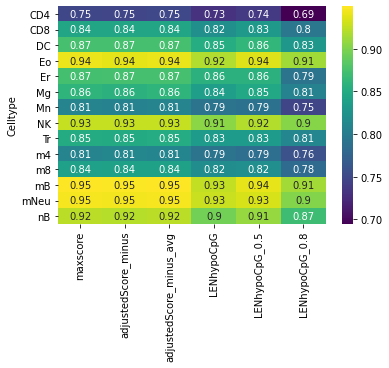

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(celltypeAUCdf, annot=True,cmap='viridis')
plt.savefig(outfile+"_Allheyper"+str(consideringALLheyper)+"_AUC.pdf",bbox_inches = "tight")

In [17]:
celltypeAUCdf.to_csv(outfile+"_Allhyper"+str(consideringALLheyper)+"_AUC.txt",sep="\t")
celltypeoptcutpointdf.to_csv(outfile+"_Allhyper"+str(consideringALLheyper)+"_Cutpoint.txt",sep="\t")

In [18]:
end_time = time.time()

time_elapsed = (end_time - start_time)

print(time_elapsed)


8.082754850387573
